# Detection and Classification of Philippines Rice Diseases Using Deep Learning
## Ramel Cary B. Jamen - 2019-2093

### Definition of the Problem

Rice diseases pose a critical challenge to Filipino agriculture and food security. These diseases can lead to reduced yield, lower quality, and total crop loss, particularly affecting farmers with limited resources who cannot afford chemical treatments or disease-resistant seeds. The high humidity and frequent rain in the Philippines create ideal conditions for disease proliferation. Our project aims to develop a deep learning classifier that can accurately detect and classify rice diseases, providing an accessible solution for early detection and intervention.



### Data Acquisition
- Source: Omdena's Local Chapter project - Creating a Rice Disease Classifier using Open Source Data and Computer Vision
- The dataset comprises high-quality images of rice plants exhibiting various disease symptoms
- Images were collected through field photography and curated from agricultural research databases
- Each image has been validated by agricultural experts to ensure accurate disease classification
- The dataset is balanced across disease categories to prevent model bias



### Dataset Characteristics

* The dataset consists of images stored in 224 x 224 pixels resolution to facilitate the training of deep learning models.
* It includes data on rice diseases affecting plants in the Philippines, a crucial agricultural crop in the region. The country's humid climate and frequent rainfall create favorable conditions for various rice diseases.

### Dataset Categorization

* The dataset contains images categorized into 13 different rice diseases, grouped under three types:
  * **Fungal**
    + Rice Blast
    + Sheath Blight
    + Brown Spot
    + Narrow Brown Spot
    + Sheath Rot
    + Stem Rot
    + Bakanae
    + Rice False Smut
  * **Bacterial**
    + Bacterial Leaf Blight
    + Bacterial Leaf Streak
  * **Viral**
    + Tungro Virus
    + Ragged Stunt Virus
    + Grassy Stunt Virus

## Technical Implementation

### Prerequisites
- Python 3.x
- TensorFlow
- NumPy
- Matplotlib
- scikit-learn

### Installation

Clone the repository and change directory:
```
git clone https://github.com/RCJamen/rice-classification.git
cd rice-classification
```

Create virtual environment and activate it:
```
python -m venv .venv
source .venv/bin/activate
```

Install dependencies:
```
pip install -r requirements.txt
```



# Code Implementation

### Library Imports for Rice Disease Classification Model

#### Core Libraries
- `os`: Handles operating system operations and file path manipulations.
- `warnings`: Suppresses runtime warnings to maintain cleaner logs.
- `shutil`: Provides high-level file operations (specific usage not indicated in the code snippet).
- `cv2`: OpenCV library for computer vision tasks (specific usage not shown in the code snippet).
- `numpy` (as `np`): Provides support for large, multi-dimensional arrays and mathematical operations.

#### Visualization
- `matplotlib.pyplot` (as `plt`): Creates plots and visualizations for model analysis and results.

#### Deep Learning Framework (TensorFlow/Keras)
- **Pre-trained Models:**
  - `VGG16`: Pre-trained convolutional neural network model for transfer learning.
- **Neural Network Layers:**
  - `Sequential`: Linear stack of layers for building a neural network in Keras.
  - `Dense`: Fully connected neural network layer for learning features.
  - `Dropout`: Regularization layer to prevent overfitting by randomly setting a fraction of input units to zero.
  - `Flatten`: Converts multi-dimensional input into a 1D array for dense layers.

#### Data Processing
- `ImageDataGenerator`: Utility for real-time data augmentation and preprocessing.
- `Imagelab`: Used for cleaning image datasets by identifying duplicates, anomalies, or other quality issues.

#### Optimization
- `Adam`: An optimization algorithm that adapts learning rates during training for efficient convergence.

#### Model Training Utilities
- `EarlyStopping`: Stops training if the model's performance on a validation set stops improving.
- `ReduceLROnPlateau`: Adjusts learning rate when a monitored metric (e.g., validation loss) plateaus.
- `ModelCheckpoint`: Saves the model's weights during training, particularly when performance improves.

In [1]:
import os
import warnings
import cv2
import shutil
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from cleanvision.imagelab import Imagelab
warnings.filterwarnings("ignore")

print("Core libraries imported successfully.")

2024-12-26 08:42:53.878008: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-26 08:42:53.966426: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-26 08:42:54.052935: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735173774.139585   30437 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735173774.165496   30437 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-26 08:42:54.356606: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Core libraries imported successfully.


/home/ari/Downloads/173FinalProject/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Dataset Preparation and Analysis

#### Image Preprocessing

Each image is processed in the following way:

- **Pixel Value Normalization**:  
  Each pixel value is divided by 255 to scale the values between 0 and 1. This ensures consistency in image data and improves neural network training performance.

- **Duplicate Detection**:  
  Identifies **exact duplicate** and **near duplicate** images using the `Imagelab` tool and the following functions:
  - **`show_dups(dups, length, sdir)`**: Plots pairs of duplicate images for visual inspection.
  - **`print_pairs(plist, title, sd, count)`**: Prints paths of duplicate image pairs.
  
- **Lighting and Blurriness Issues**:  
  Detects and handles issues related to lighting and image quality:
  - **To Light Images**: Identifies and optionally deletes images that are too bright.
  - **To Dark Images**: Identifies and optionally deletes images that are too dark.
  - **Blurry Images**: Detects blurry images and allows for their deletion.
  - **Low Information Images**: Identifies images with insufficient information content.

- **Visualization and Deletion Options**:  
  The following interactive options are available for handling image issues:
  - **Print Duplicates**: Allows specifying how many duplicate pairs to print.
  - **Plot Images**: Displays identified duplicates and problematic images.
  - **Delete Options**: Offers the ability to delete duplicates and images with identified issues by entering `D`.

#### Dataset Split
Our dataset is divided into two parts:
- Training Set (80% of data)
- Validation Set (20% of data)

In [3]:
def show_dups(dups, length, sdir):
    height=int ((length +1)*4)
    plt.figure(figsize=(15, height))
    for i in range(length):
        f1path=dups[i][0]
        f2path=dups[i][1]
        img1=cv2.imread(f1path)
        img1=cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
        img2=cv2.imread(f2path)
        img2=cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
        j= i*2
        plt.subplot(length,2,j+1)
        title=f1path.replace(sdir, '')
        plt.title(title, color='blue', fontsize=14)
        plt.axis('off')
        plt.imshow(img1)
        plt.subplot(length,2,j+2)
        title=f2path.replace(sdir, '')
        plt.title(title,color='blue', fontsize=14)
        plt.axis('off')
        plt.imshow(img2)
    plt.show()

def show_images(paths, count,sdir):
    height=int((count+1))
    plt.figure(figsize=(15, height))
    for i in range(count):
        fpath=paths[i]
        img=cv2.imread(fpath)
        shape=img.shape
        imgh=150
        imgw=int(imgh*shape[1]/shape[0])
        img=cv2.resize(img, (imgw, imgh))
        img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        rows=int(count/4) +1
        plt.subplot(rows, 4, i+1)
        plt.axis('off')
        title=fpath.replace(sdir, '')
        plt.title(title, color='blue', fontsize=10)
        plt.imshow(img)
    plt.show()

def print_pairs(plist, title, sd, count):
    print('{0:^40s}{1:^40s}'.format('Original Image', title))
    for i in range(count):
        e=plist[i]
        ed0=e[0].replace(sd, '')
        ed1=e[1].replace(sd, '')
        print ('{0:^40s}{1:^40s}'.format(ed0, ed1))

def analyze_dataset(sdir):
    imagelab = Imagelab(sdir)
    imagelab.find_issues()
    print(imagelab.issue_summary)
    delete_list=[]

    exact_duplicates=list(imagelab.info['exact_duplicates']['sets'])
    length=len(exact_duplicates)
    if length == 0:
        print('No duplicate images were found')
    else:
        dup_count=0
        plist=[]
        for i, ed in enumerate(exact_duplicates):
            lengthp=len(ed)
            for j in range(1, lengthp):
                plist.append([ed[0], ed[j]])
                dup_count += 1
        print('there are ', dup_count, ' pairs of duplicate images, enter an integer for how many to print, enter 0 for no print out')
        ans=int(input(' '))
        if ans !=0:
            print_pairs(plist, 'duplicate image', sdir, ans)
        ans=int(input(' enter an integer for how many duplicate pairs to plot, enter 0 for no plot'))
        if ans != 0:
            show_dups( plist, ans, sdir)
        print('enter D to delete all exact duplicates or press Enter to not delete')
        ans=input(' ')
        if ans == 'D' or ans == 'd':
            for i, ed in enumerate(exact_duplicates):
                lengthp=len(ed)
                for j in range(1, lengthp):
                    if ed[j] not in delete_list:
                        delete_list.append(ed[j])

    near_duplicates=list(imagelab.info['near_duplicates']['sets'])
    length=len(near_duplicates)
    if length == 0:
        print('No near duplicate images were found')
    else:
        dup_count=0
        plist=[]
        for i, ed in enumerate(near_duplicates):
            lengthp=len(ed)
            for j in range(1, lengthp):
                plist.append([ed[0], ed[j]])
                dup_count += 1
        print('there are ', dup_count, ' pairs of near duplicate images, enter an integer for how many to print, enter 0 for no print out')
        ans=int(input(' '))
        if ans !=0:
            print_pairs(plist, 'near duplicate image', sdir, ans)
        ans=int(input(' enter an integer for how many near duplicate pairs to plot, enter 0 for no plot'))
        if ans != 0:
            show_dups( plist, ans, sdir)
        print('enter D to delete all near duplicates or press Enter to not delete')
        ans=input(' ')
        if ans == 'D' or ans == 'd':
            for i, ed in enumerate(near_duplicates):
                lengthp=len(ed)
                for j in range(1, lengthp):
                    if ed[j] not in delete_list:
                        delete_list.append(ed[j])
    to_light = imagelab.issues[imagelab.issues["is_light_issue"] == True].sort_values(by=['light_score']).index.tolist()
    length=len(to_light)
    if length == 0:
        print('There are no images that are to light')
    else:
        ans=input('Enter P to print all ', length, ' to light images or press enter to not print ')
        if ans == 'P' or ans == 'p':
            for f in to_light:
                print (f)
        ans=int(input(' enter an integer for how many to light images to plot, enter 0 for no plot'))
        if ans != 0:
            show_images(to_light, ans, sdir)
        ans=input('Enter D to delete the ', length, ' to light images, to not delete press Enter ' )
        if ans == 'D' or ans == 'd':
            for imgpath in to_light:
                if imgpath not in delete_list:
                    delete_list.append(imgpath)

    to_dark = imagelab.issues[imagelab.issues["is_dark_issue"] == True].sort_values(by=['dark_score']).index.tolist()
    length=len(to_dark)
    if length == 0:
        print('There are no images that are to dark')
    else:
        print('there are ', length, ' to dark images, enter an integer for how many to print, enter 0 for no print out')
        ans=int(input(' '))
        if ans !=0:
            for i in range (ans):
              print(to_dark[i])

        ans=int(input(' enter an integer for how many to dark images to plot, enter 0 for no plot'))
        if ans != 0:
            show_images(to_dark, ans, sdir)
        print('Enter D to delete the ', length, ' to dark images, to not delete press Enter ')
        ans=input(' ' )
        if ans == 'D' or ans == 'd':
            for imgpath in to_dark:
                if imgpath not in delete_list:
                    delete_list.append(imgpath)

    blurry_images = imagelab.issues[imagelab.issues["is_blurry_issue"] == True].sort_values(by=['blurry_score']).index.tolist()
    length=len(blurry_images)
    if length == 0:
        print('There are no blurry images ')
    else:
        print('there are ', length, ' blurry images, enter an integer for how many to print, enter 0 for no print out')
        ans=int(input(' '))
        if ans !=0:
            for i in range (ans):
              print(blurry_images[i])
        ans=int(input(' enter an integer for how many to blurry images to plot, enter 0 for no plot'))
        if ans != 0:
            show_images(blurry_images, ans, sdir)
        print('Enter D to delete all ', length, ' to blurry images, to not delete press Enter ')
        ans=input(' ' )
        if ans == 'D' or ans == 'd':
            for imgpath in blurry_images:
                if imgpath not in delete_list:
                    delete_list.append(imgpath)

    no_info = imagelab.issues[imagelab.issues["is_low_information_issue"] == True].sort_values(by=['low_information_score']).index.tolist()
    length=len(no_info)
    if length == 0:
        print('No  low information images were found')
    else:
        print('there are ', length, ' low information images, enter an integer for how many to print, enter 0 for no print out')
        ans=int(input(' '))
        if ans !=0:
            for i in range (ans):
              print(no_info[i])
        ans=int(input(' enter an integer for how many to low information images to plot, enter 0 for no plot'))
        if ans != 0:
            show_images(no_info, ans,sdir)
        print('Enter D to delete all ', length, ' to low info images, to not delete press Enter ')
        ans=input(' ' )
        if ans == 'D' or ans == 'd':
            for imgpath in no_info:
                if imgpath not in delete_list:
                    delete_list.append(imgpath)
    print('*****  Data set processing is completed  *****')
    return delete_list

The dataset has been copied to ./working/dataset
Reading images from /home/ari/Downloads/173FinalProject/working/dataset
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


100%|██████████| 1555/1555 [00:01<00:00, 1465.67it/s]


Issue checks completed. 31 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().
         issue_type  num_images
0   low_information          18
1  exact_duplicates           8
2   near_duplicates           4
3            blurry           1
4              dark           0
5             light           0
6  odd_aspect_ratio           0
7          odd_size           0
8         grayscale           0
there are  4  pairs of duplicate images, enter an integer for how many to print, enter 0 for no print out
             Original Image                         duplicate image             
/home/ari/Downloads/173FinalProject/working/dataset/bacterial_leaf_blight/BLB (124).jpg/home/ari/Downloads/173FinalProject/working/dataset/bacterial_leaf_blight/BLB (133).jpg
/home/ari/Downloads/173FinalProject/working/dataset/bacterial_leaf_blight/BLB (73).jpg/home/ari/Downloads/173FinalProject/working/dataset/bacterial_leaf_blight/BLB (77).jpg
/home/ari/Downloads/173F

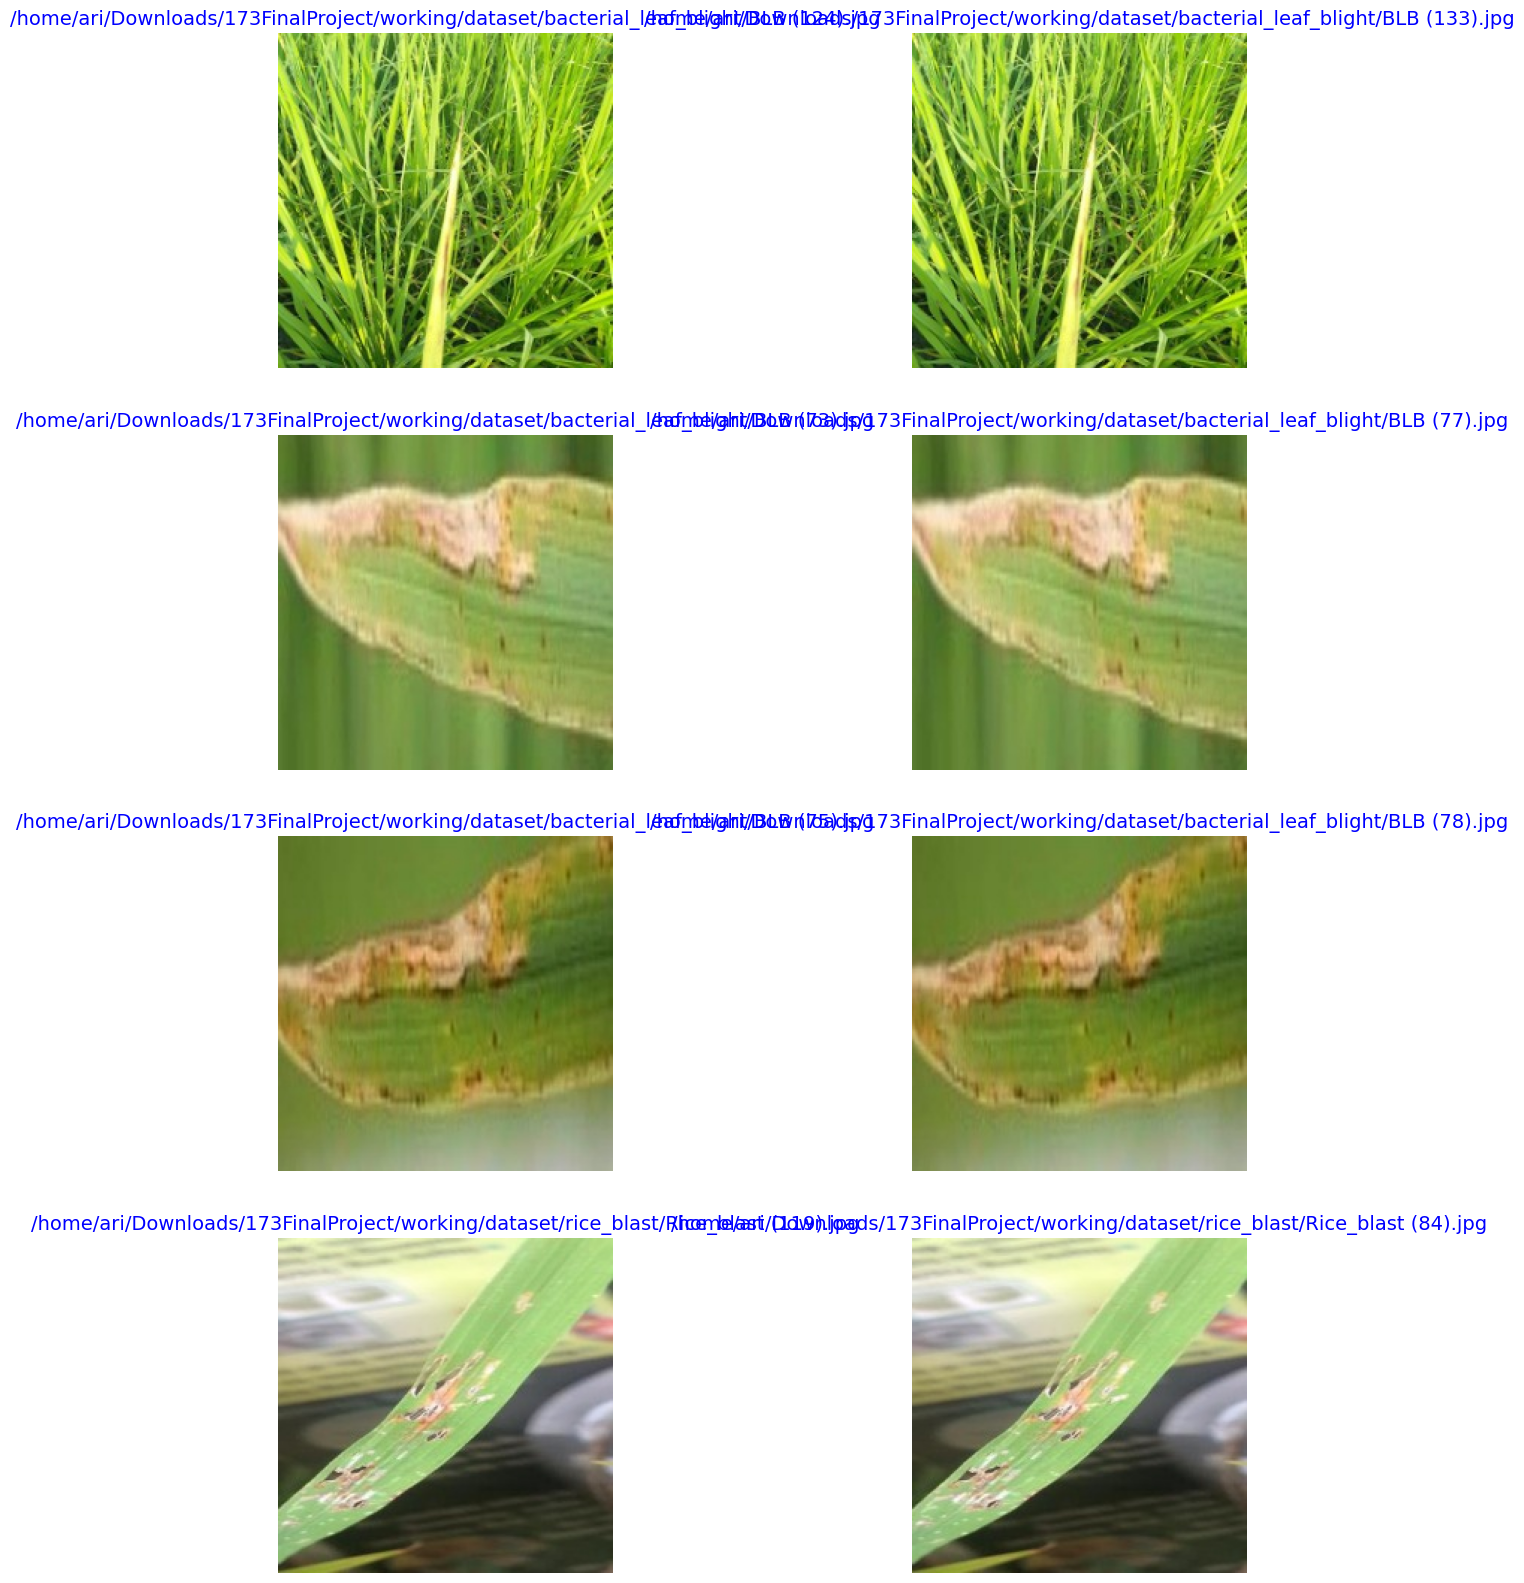

enter D to delete all exact duplicates or press Enter to not delete
there are  2  pairs of near duplicate images, enter an integer for how many to print, enter 0 for no print out
             Original Image                       near duplicate image          
/home/ari/Downloads/173FinalProject/working/dataset/rice_blast/Rice_blast (33).jpg/home/ari/Downloads/173FinalProject/working/dataset/rice_blast/Rice_blast (61).jpg
/home/ari/Downloads/173FinalProject/working/dataset/rice_blast/Rice_blast (34).jpg/home/ari/Downloads/173FinalProject/working/dataset/rice_blast/Rice_blast (63).jpg


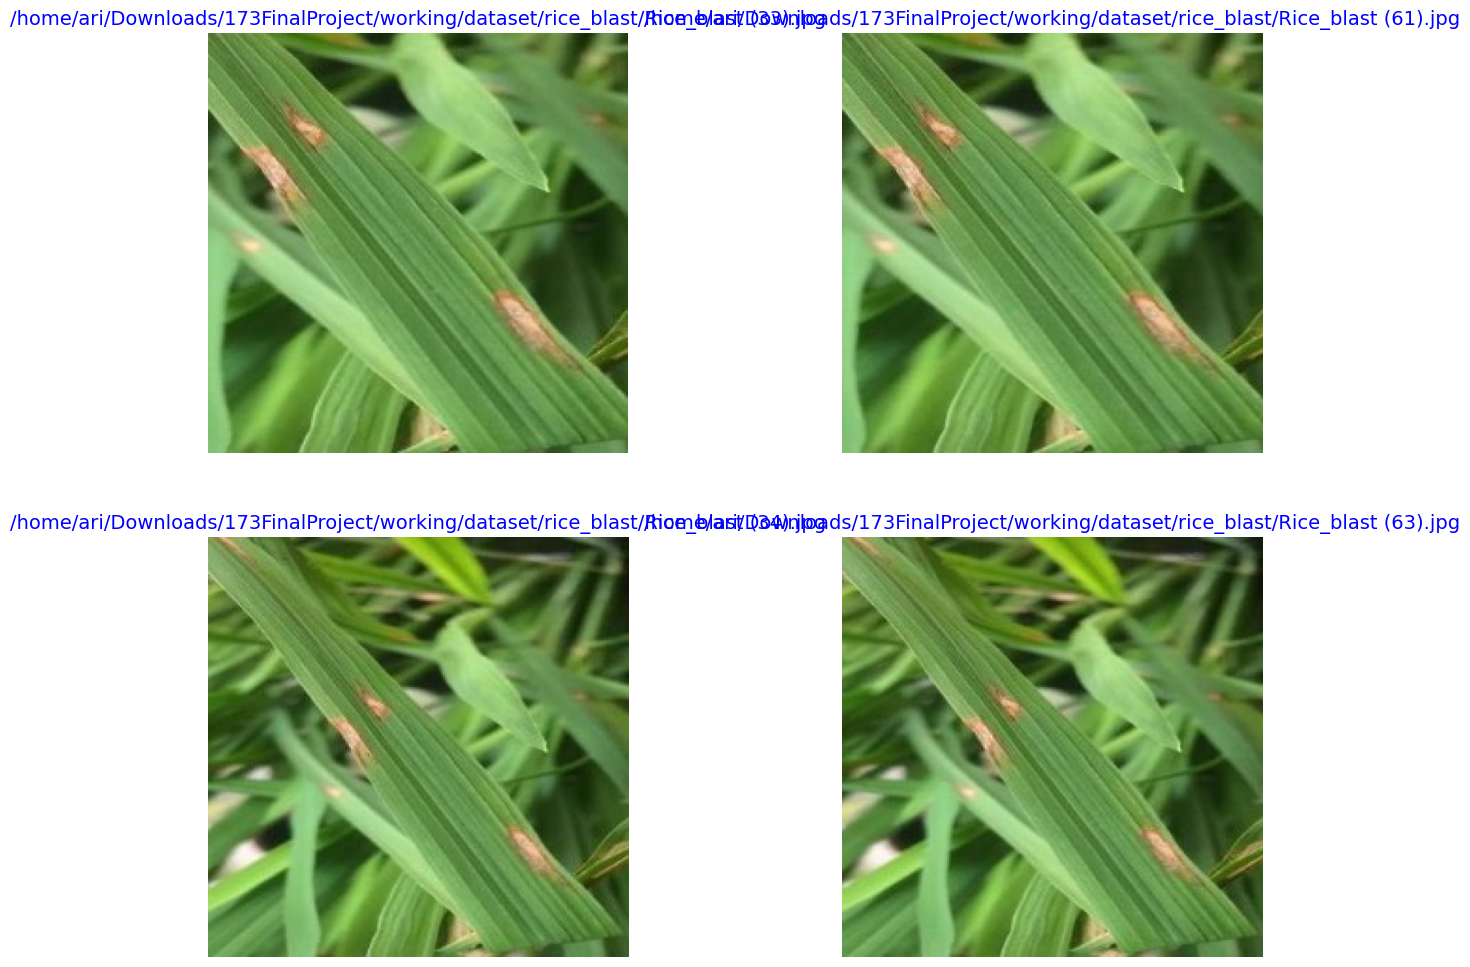

enter D to delete all near duplicates or press Enter to not delete
There are no images that are to light
There are no images that are to dark
there are  1  blurry images, enter an integer for how many to print, enter 0 for no print out
/home/ari/Downloads/173FinalProject/working/dataset/brown_spot/Brown_spot (119).jpg


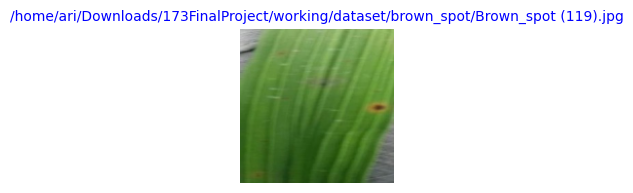

Enter D to delete all  1  to blurry images, to not delete press Enter 
there are  18  low information images, enter an integer for how many to print, enter 0 for no print out
/home/ari/Downloads/173FinalProject/working/dataset/narrow_brown_spot/narrow_brown (68).jpg
/home/ari/Downloads/173FinalProject/working/dataset/narrow_brown_spot/narrow_brown (89).jpg
/home/ari/Downloads/173FinalProject/working/dataset/narrow_brown_spot/narrow_brown (59).jpg
/home/ari/Downloads/173FinalProject/working/dataset/narrow_brown_spot/narrow_brown (69).jpg


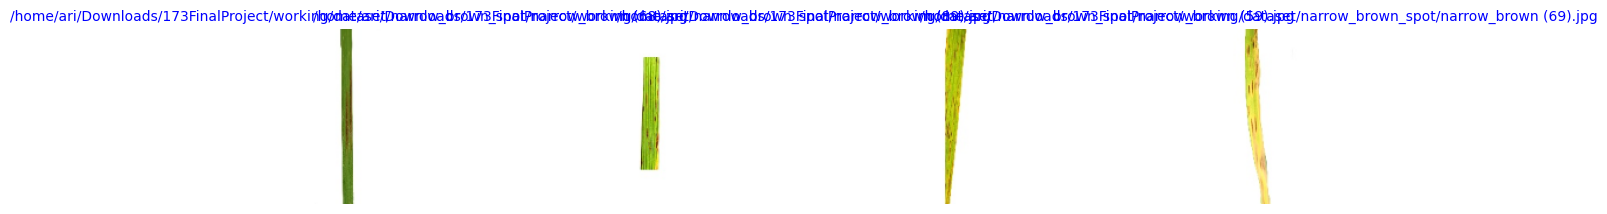

Enter D to delete all  18  to low info images, to not delete press Enter 
*****  Data set processing is completed  *****
Deleting specified files from the working dataset...
25 images were deleted; the corrected dataset is located in ./working/dataset.


In [6]:
# Define the dataset directory and copy it to the working directory
original_dataset_dir = r'dataset'
working_dir = r'./working'
working_dataset_dir = os.path.join(working_dir, 'dataset')

# Ensure no existing destination directory
if os.path.isdir(working_dataset_dir):
    shutil.rmtree(working_dataset_dir)

# Copy the dataset to the working directory
shutil.copytree(original_dataset_dir, working_dataset_dir)
print(f'The dataset has been copied to {working_dataset_dir}')

# Use the working directory dataset for analysis
delete_list = analyze_dataset(working_dataset_dir)

if len(delete_list) == 0:
    print('No files were deleted; the dataset remains unchanged.')
else:
    print('Deleting specified files from the working dataset...')
    for imgpath in delete_list:
        if os.path.exists(imgpath):
            os.remove(imgpath)
        else:
            print(f"File not found: {imgpath}")

    print(f'{len(delete_list)} images were deleted; the corrected dataset is located in {working_dataset_dir}.')


#### Data Augmentation
To prevent overfitting and increase our dataset size, we apply these random transformations:
- Rotation: up to 20 degrees
- Width shift: up to 20%
- Height shift: up to 20%
- Shear transformation: up to 20%
- Zoom: up to 20%
- Horizontal flip: randomly flip images
- Fill mode: 'nearest' (for any new pixels created)

In [7]:
IMG_WIDTH, IMG_HEIGHT = 224, 224

# Create an ImageDataGenerator with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

test_datagen = train_datagen

# Load all the images from the dataset directory
train_generator = train_datagen.flow_from_directory(
    working_dataset_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = test_datagen.flow_from_directory(
    working_dataset_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1228 images belonging to 14 classes.
Found 302 images belonging to 14 classes.


#### Data Visualization
We created a function to visualize our dataset:
- Shows 18 images at once (3 rows × 6 columns)
- Displays the class label for each image
- Helps verify data loading and augmentation

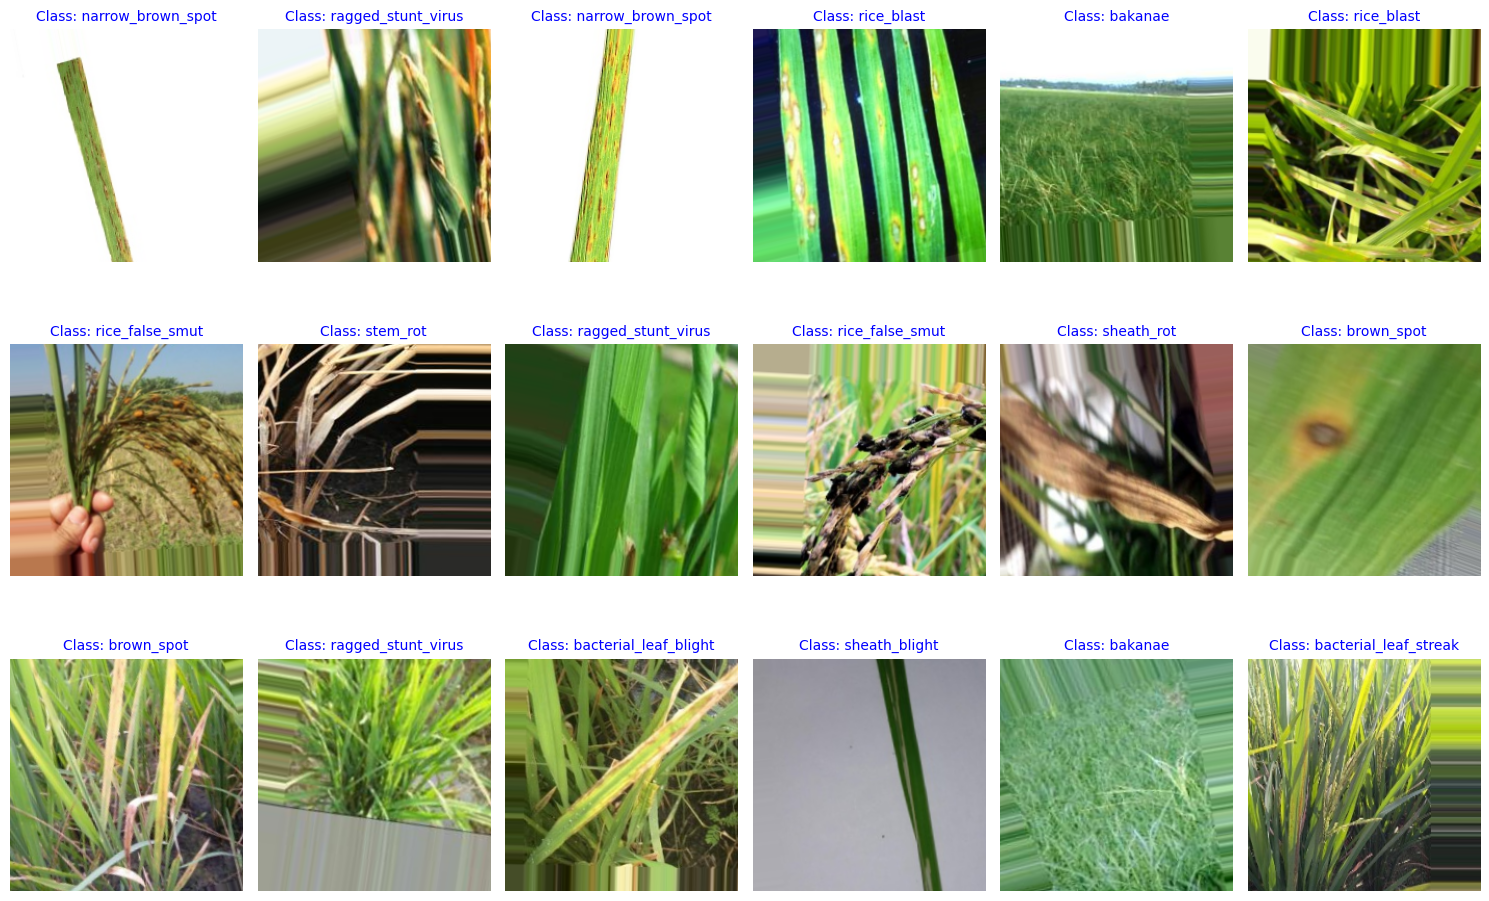

In [8]:
def show_images(generator, class_labels, num_images=18):
    fig, axes = plt.subplots(3, 6, figsize=(15, 10))
    axes = axes.ravel()

    images, labels = next(generator)  # get a batch of images

    for i in range(num_images):
        axes[i].imshow(images[i])
        class_idx = np.argmax(labels[i])
        axes[i].set_title(f'Class: {class_labels[class_idx]}', color='blue', fontsize=10)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Visualize some images from the dataset
class_labels = list(train_generator.class_indices.keys())
show_images(train_generator, class_labels)

#### Dataset Statistics
In this section, we analyze and visualize key statistics about our dataset:
- Total number of classes and their names
- Number of samples in training and validation sets
- Distribution of images across different disease classes
- Basic image statistics like dimensions and pixel value ranges
- Visual representation of class distribution through a bar plot

This helps us understand:
- If our dataset is balanced
- The scale and scope of our classification task
- The characteristics of our input images



Dataset Statistics:
Total number of classes: 14
Class names: ['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bakanae', 'brown_spot', 'grassy_stunt_virus', 'healthy_rice_plant', 'narrow_brown_spot', 'ragged_stunt_virus', 'rice_blast', 'rice_false_smut', 'sheath_blight', 'sheath_rot', 'stem_rot', 'tungro_virus']

Training set:
Number of training samples: 1228
Steps per epoch: 38
Class distribution:
- bacterial_leaf_blight: 137 images
- bacterial_leaf_streak: 99 images
- bakanae: 100 images
- brown_spot: 149 images
- grassy_stunt_virus: 100 images
- healthy_rice_plant: 140 images
- narrow_brown_spot: 80 images
- ragged_stunt_virus: 100 images
- rice_blast: 137 images
- rice_false_smut: 99 images
- sheath_blight: 98 images
- sheath_rot: 91 images
- stem_rot: 100 images
- tungro_virus: 100 images

Validation set:
Number of validation samples: 302
Validation steps: 9


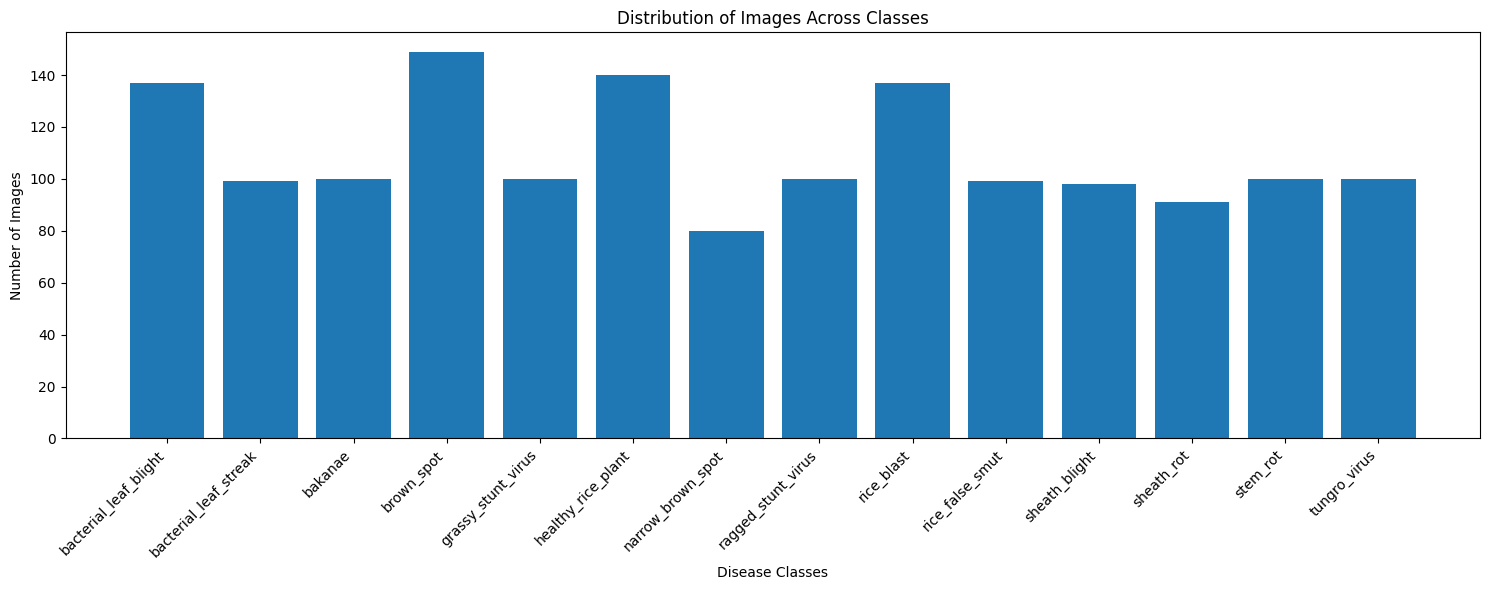


Image Statistics:
Image dimensions: (224, 224, 3)
Pixel value range: [0.000, 1.000]
Mean pixel value: 0.423
Std pixel value: 0.244


In [9]:
# After creating the generators, add these lines to get dataset statistics
print("\nDataset Statistics:")
print(f"Total number of classes: {len(train_generator.class_indices)}")
print(f"Class names: {list(train_generator.class_indices.keys())}")
print("\nTraining set:")
print(f"Number of training samples: {train_generator.samples}")
print(f"Steps per epoch: {train_generator.n // train_generator.batch_size}")
print(f"Class distribution:")
for class_name, class_idx in train_generator.class_indices.items():
    class_count = len(os.listdir(os.path.join(working_dataset_dir, class_name)))
    print(f"- {class_name}: {class_count} images")

print("\nValidation set:")
print(f"Number of validation samples: {validation_generator.samples}")
print(f"Validation steps: {validation_generator.n    // validation_generator.batch_size}")

# Create a bar plot of class distribution
plt.figure(figsize=(15, 6))
class_counts = [len(os.listdir(os.path.join(working_dataset_dir, class_name)))
                for class_name in train_generator.class_indices.keys()]
plt.bar(train_generator.class_indices.keys(), class_counts)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Images Across Classes')
plt.xlabel('Disease Classes')
plt.ylabel('Number of Images')
plt.tight_layout()
plt.show()

# Calculate and display image statistics
print("\nImage Statistics:")
sample_batch = next(train_generator)[0]  # Get a batch of images
print(f"Image dimensions: {sample_batch[0].shape}")
print(f"Pixel value range: [{sample_batch.min():.3f}, {sample_batch.max():.3f}]")
print(f"Mean pixel value: {sample_batch.mean():.3f}")
print(f"Std pixel value: {sample_batch.std():.3f}")

### Create VGG16 Model Structure


The model architecture consists of the following layers:

1. Base Model: VGG16
   - Pre-trained on the ImageNet dataset.
   - Weights are frozen (non-trainable) to preserve the learned features.
   - The top layers of VGG16 are removed (include_top=False) to allow customization.
   - Input shape: (IMG_HEIGHT, IMG_WIDTH, 3) for RGB images, where IMG_HEIGHT and IMG_WIDTH are the dimensions of the input image.
2. Flatten Layer
   - Converts the 3D feature maps from the VGG16 output to a 1D vector.
   - Prepares the data for fully connected dense layers.
3. Dense Layer (512 units)
   - A fully connected layer with 512 neurons.
   - Uses ReLU activation to introduce non-linearity.
   - Learns high-level feature combinations from the flattened VGG16 output.
4. Dropout Layer (0.5)
   - Randomly deactivates 50% of neurons during training
   - Prevents overfitting by reducing co-adaptation of neurons. 
5. Output Layer
   - Contains 14 neurons, corresponding to the 14 rice disease classes.
   - Uses Softmax activation to output a multi-class probability distribution for classification.

Compilation:
   - Optimizer: Adam with a learning rate of 0.0001.
   - Loss Function: Categorical crossentropy for multi-class classification.
   - Metrics: Accuracy, used for monitoring model performance during training.

In [7]:
model = Sequential()
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
for layer in base_model.layers:
    layer.trainable = False
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(14, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

2024-12-20 09:52:08.024064: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 14)             │         7,182 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,567,438 (105.16 MB)

 Trainable params: 12,852,750 (49.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

#### Define callback functions


1. EarlyStopping
   - Monitors validation loss
   - Stops training if no improvement after 10 epochs
   - Helps prevent overfitting
2. ReduceLROnPlateau
   - Monitors validation loss
   - Reduces learning rate by factor of 0.1 if no improvement after 5 epochs
   - Minimum learning rate: 0.00001
3. ModelCheckpoint
   - Saves best model based on validation accuracy
   - Only saves when model improves
   - Saves to 'rice_disease_classifier.keras'


In [8]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6, verbose=1)
checkpoint = ModelCheckpoint('VGG16_rice_disease_classifier.keras', monitor='val_accuracy', verbose=1, save_best_only=True)

#### Train the model

- Train the model for 100 epochs with early stopping, learning rate reduction, and model checkpointing
- The model will be trained on the training data and validated on the validation data
- Early stopping will prevent overfitting by monitoring validation loss
- Learning rate will be reduced if validation loss plateaus
- Best model weights will be saved based on validation accuracy


In [9]:
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

Epoch 1/100


2024-12-20 09:52:11.931160: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2024-12-20 09:52:12.158064: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2024-12-20 09:52:12.555224: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.
2024-12-20 09:52:12.667680: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 205520896 exceeds 10% of free system memory.
2024-12-20 09:52:12.826190: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 205520896 exceeds 10% of free system memory.


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1759 - loss: 2.6099
Epoch 1: val_accuracy improved from -inf to 0.39404, saving model to rice_disease_classifier.keras
39/39 ━━━━━━━━━━━━━━━━━━━━ 213s 5s/step - accuracy: 0.1782 - loss: 2.6025 - val_accuracy: 0.3940 - val_loss: 1.8768 - learning_rate: 1.0000e-04
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4311 - loss: 1.8255
Epoch 2: val_accuracy improved from 0.39404 to 0.51987, saving model to rice_disease_classifier.keras
39/39 ━━━━━━━━━━━━━━━━━━━━ 205s 5s/step - accuracy: 0.4316 - loss: 1.8236 - val_accuracy: 0.5199 - val_loss: 1.5479 - learning_rate: 1.0000e-04
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4714 - loss: 1.6008
Epoch 3: val_accuracy improved from 0.51987 to 0.59603, saving model to rice_disease_classifier.keras
39/39 ━━━━━━━━━━━━━━━━━━━━ 209s 5s/step - accuracy: 0.4721 - loss: 1.5994 - val_accuracy: 0.5960 - val_loss: 1.3880 - learning_rate: 1.0000e-04
Epoch 4/100
39/39 ━━━━━━━

#### Evaluate the model


In [10]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Model accuracy: {accuracy:.2f}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.7962 - loss: 0.6345
Model accuracy: 0.81


#### Visualize some predictions


Let's visualize some example predictions from our model. We'll display 18 images from the validation set in a 3x6 grid.
For each image, we'll show:
- The original image
- The true label in green if predicted correctly
- The predicted label in red if predicted incorrectly



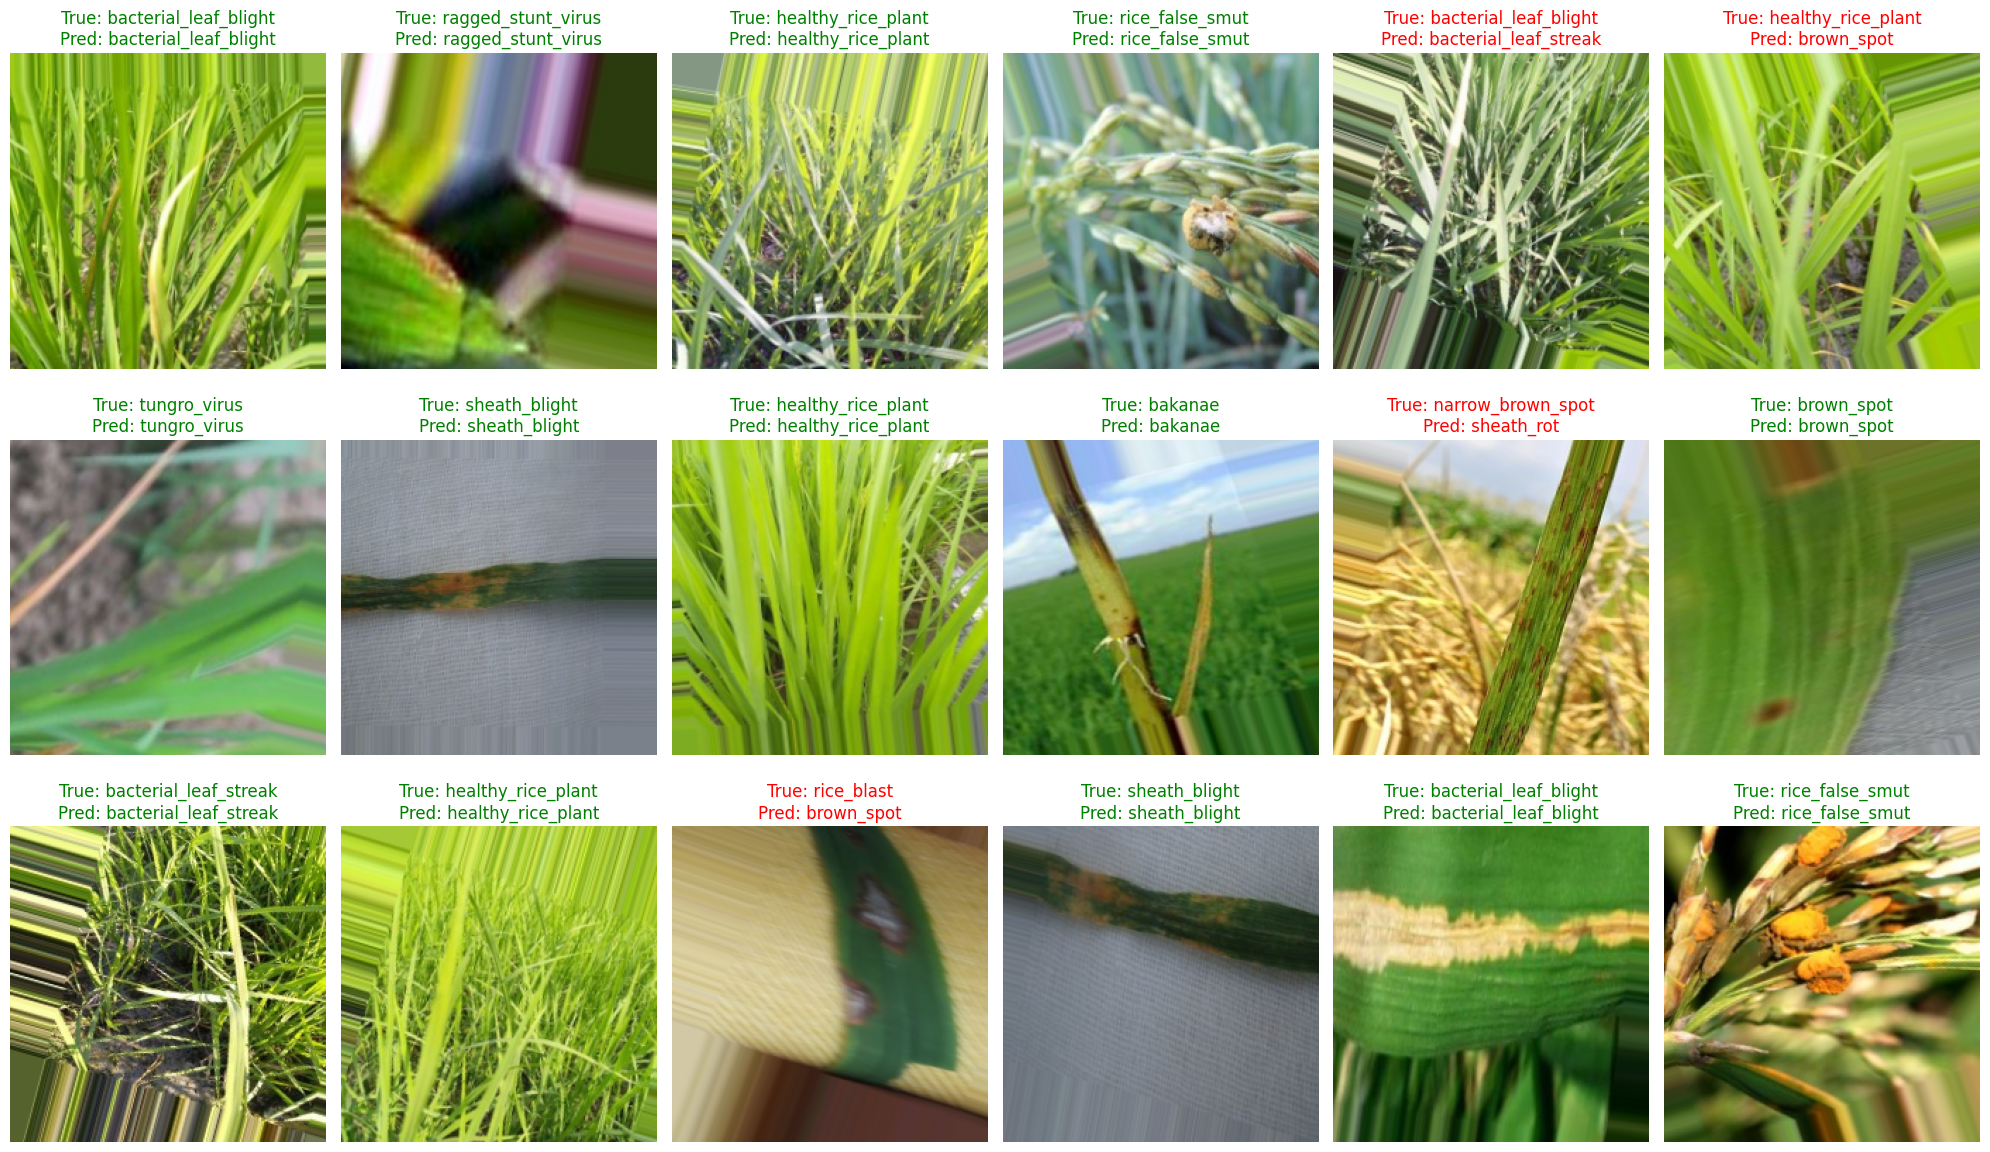

In [12]:
fig, axes = plt.subplots(3, 6, figsize=(20, 12))
axes = axes.ravel()

for i in range(18):
    # Get a single batch
    batch_x, batch_y = next(validation_generator)

    # Make prediction
    pred = model.predict(batch_x[0:1], verbose=0)
    true_class = np.argmax(batch_y[0])
    pred_class = np.argmax(pred[0])

    # Plot image and labels
    axes[i].imshow(batch_x[0])
    axes[i].set_title(f'True: {class_labels[true_class]}\nPred: {class_labels[pred_class]}',
                     color='green' if true_class == pred_class else 'red',
                     fontsize=12)
    axes[i].axis('off')

plt.tight_layout()
plt.show()